## Pandas

In [2]:
import pandas as pd
import pyarrow.parquet as pq
import matplotlib.pyplot as plt

In [4]:
# PyArrow directamente para ver el esquema completo
# green = pq.ParquetFile('green_tripdata_2025-01.parquet')
# print(green.schema)

green_schema = pq.read_schema('green_tripdata_2025-01.parquet')
print(green_schema)

VendorID: int32
lpep_pickup_datetime: timestamp[us]
lpep_dropoff_datetime: timestamp[us]
store_and_fwd_flag: large_string
RatecodeID: int64
PULocationID: int32
DOLocationID: int32
passenger_count: int64
trip_distance: double
fare_amount: double
extra: double
mta_tax: double
tip_amount: double
tolls_amount: double
ehail_fee: double
improvement_surcharge: double
total_amount: double
payment_type: int64
trip_type: int64
congestion_surcharge: double
cbd_congestion_fee: double


In [5]:
yellow = pq.ParquetFile('yellow_tripdata_2025-01.parquet')
print(yellow.schema)

required group field_id=-1 schema {
  optional int32 field_id=-1 VendorID;
  optional int64 field_id=-1 tpep_pickup_datetime (Timestamp(isAdjustedToUTC=false, timeUnit=microseconds, is_from_converted_type=false, force_set_converted_type=false));
  optional int64 field_id=-1 tpep_dropoff_datetime (Timestamp(isAdjustedToUTC=false, timeUnit=microseconds, is_from_converted_type=false, force_set_converted_type=false));
  optional int64 field_id=-1 passenger_count;
  optional double field_id=-1 trip_distance;
  optional int64 field_id=-1 RatecodeID;
  optional binary field_id=-1 store_and_fwd_flag (String);
  optional int32 field_id=-1 PULocationID;
  optional int32 field_id=-1 DOLocationID;
  optional int64 field_id=-1 payment_type;
  optional double field_id=-1 fare_amount;
  optional double field_id=-1 extra;
  optional double field_id=-1 mta_tax;
  optional double field_id=-1 tip_amount;
  optional double field_id=-1 tolls_amount;
  optional double field_id=-1 improvement_surcharge;
  op

In [6]:
fhv = pq.ParquetFile('fhv_tripdata_2025-01.parquet')
print(fhv.schema)


required group field_id=-1 schema {
  optional binary field_id=-1 dispatching_base_num (String);
  optional int64 field_id=-1 pickup_datetime (Timestamp(isAdjustedToUTC=false, timeUnit=microseconds, is_from_converted_type=false, force_set_converted_type=false));
  optional int64 field_id=-1 dropOff_datetime (Timestamp(isAdjustedToUTC=false, timeUnit=microseconds, is_from_converted_type=false, force_set_converted_type=false));
  optional int64 field_id=-1 PUlocationID;
  optional int64 field_id=-1 DOlocationID;
  optional int64 field_id=-1 SR_Flag;
  optional binary field_id=-1 Affiliated_base_number (String);
}



In [7]:
fhvhv = pq.ParquetFile('fhvhv_tripdata_2025-01.parquet')
print(fhvhv.schema)

required group field_id=-1 schema {
  optional binary field_id=-1 hvfhs_license_num (String);
  optional binary field_id=-1 dispatching_base_num (String);
  optional binary field_id=-1 originating_base_num (String);
  optional int64 field_id=-1 request_datetime (Timestamp(isAdjustedToUTC=false, timeUnit=microseconds, is_from_converted_type=false, force_set_converted_type=false));
  optional int64 field_id=-1 on_scene_datetime (Timestamp(isAdjustedToUTC=false, timeUnit=microseconds, is_from_converted_type=false, force_set_converted_type=false));
  optional int64 field_id=-1 pickup_datetime (Timestamp(isAdjustedToUTC=false, timeUnit=microseconds, is_from_converted_type=false, force_set_converted_type=false));
  optional int64 field_id=-1 dropoff_datetime (Timestamp(isAdjustedToUTC=false, timeUnit=microseconds, is_from_converted_type=false, force_set_converted_type=false));
  optional int32 field_id=-1 PULocationID;
  optional int32 field_id=-1 DOLocationID;
  optional double field_id=-1 

## Promedio de ingresos brutos 

### Taxis Green, Yellow, Fhv, Fhvhv

In [8]:
# Selecciono la col de interés de green:
cols_green = ['total_amount']
# Accedo a los valores de esa columna y lo convierte a DataFrame
green = pq.read_table('green_tripdata_2025-01.parquet', columns=cols_green).to_pandas()
# Se hace la suma en una nueva columna llamada total_income
green_income_avg = green['total_amount'].mean()
print("Ingresos brutos de Green:", green_income_avg)

# Selecciono la col de yellow
cols_yellow = ['total_amount']
yellow = pq.read_table('yellow_tripdata_2025-01.parquet', columns=cols_yellow).to_pandas()
yellow_income_avg = yellow['total_amount'].mean()
print("Ingresos brutos de Yellow:", yellow_income_avg)

# Selecciono la col de fhv
print("Fhv no muestra datos para calcular Ingresos brutos y de fhvhv no cargaron.")

promedio_taxis= (green_income_avg+yellow_income_avg)/2
print("Promedio de ingresos de green y yellow:", promedio_taxis)



Ingresos brutos de Green: 22.63424160907172
Ingresos brutos de Yellow: 25.61129169728817
Fhv no muestra datos para calcular Ingresos brutos y de fhvhv no cargaron.
Promedio de ingresos de green y yellow: 24.122766653179944


## Tipo de Taxis que recorrieron la mayor cantidad de distancia en Enero

In [9]:
# Datos green
green = pq.read_table('green_tripdata_2025-01.parquet', columns=['trip_distance', 'tip_amount', 'tolls_amount']).to_pandas()
green_total_distance = green['trip_distance'].sum()

# Leer datos yellow
yellow = pq.read_table('yellow_tripdata_2025-01.parquet', columns=['trip_distance', 'tip_amount', 'tolls_amount']).to_pandas()
yellow_total_distance = yellow['trip_distance'].sum()

# Comparar
if green_total_distance > yellow_total_distance:
    print(f"Green taxis recorrieron más distancia: {green_total_distance:.2f} millas")
else:
    print(f"Yellow taxis recorrieron más distancia: {yellow_total_distance:.2f} millas")

Yellow taxis recorrieron más distancia: 20347886.73 millas


### Tipo de taxi que recibe más propinas en promedio

In [10]:
# Green
green_tips= green['tip_amount'].mean()

# Yellow
yellow_tips = yellow['tip_amount'].mean()

#fhv
fhvhv = pq.read_table('fhvhv_tripdata_2025-01.parquet', columns=['tips', 'tolls']).to_pandas()
fhvhv_tips = fhvhv['tips'].mean()

#Comparaciones
if green_tips>yellow_tips and green_tips>fhvhv_tips:
    print(f"Green taxis reciben más propinas en promedio. Recibieron: {green_tips:.2f} dólares en promedio.")
elif yellow_tips>green_tips and yellow_tips>fhvhv_tips:
    print(f"Yellow taxis reciben más propinas en promedio. Recibieron: {yellow_tips:.2f} dólares en promedio.")
else:
    print(f"Fhvhv taxis reciben más propinas en promedio. Recibieron: {fhvhv_tips:.2f} dólares en promedio.")




Yellow taxis reciben más propinas en promedio. Recibieron: 2.96 dólares en promedio.


### Importe del peaje total de cada tipo de Taxi

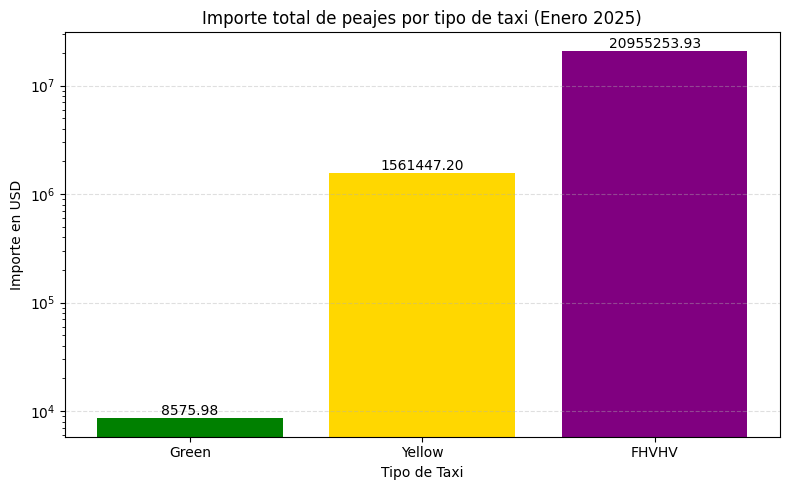

In [11]:
# Green
green_tolls = green['tolls_amount'].sum()

# Yellow
yellow_tolls = yellow['tolls_amount'].sum()

# fhvhv
fhvhv_tolls = fhvhv['tolls'].sum()

# Datos para gráfica
taxi_types = ['Green', 'Yellow', 'FHVHV']
total_tolls = [green_tolls, yellow_tolls, fhvhv_tolls]

# Gráfico
plt.figure(figsize=(8,5))
bars = plt.bar(taxi_types, total_tolls, color=['green', 'gold', 'purple'])

# Agregar valores arriba de las barras
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 2, f'{height:.2f}', 
             ha='center', va='bottom', fontsize=10)

plt.title('Importe total de peajes por tipo de taxi (Enero 2025)')
plt.ylabel('Importe en USD')
plt.xlabel('Tipo de Taxi')
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.yscale('log')
plt.tight_layout()
plt.show()
